<a href="https://colab.research.google.com/github/turtle-shifa/Validate-your-DFA-model/blob/main/V1_1_Validate_your_DFA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

In [82]:
def visualize(dfa_dict):
  G = nx.DiGraph()
  nodes = []
  for node in dfa_dict.keys():
    nodes.append(node)

  accepting_nodes = accept_state
  starting_node = srt_state

  edges = []
  for state,info in dfa_dict.items():
    for i in info:
      edges.append((state,i[0],i[1]))

  G.add_nodes_from(nodes)
  G.add_weighted_edges_from([(u, v, 0) for u, v, w in edges])


  pos = nx.spring_layout(G)

  node_colors = []
  for node in G.nodes():
    if node == starting_node:
      node_colors.append('red')
    elif node in accepting_nodes:
      node_colors.append('blue')
    else:
      node_colors.append('gray')

  nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_weight='bold',font_color='white')

  edge_labels = {(u, v): w for u, v, w in edges}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')

  plt.title("DFA Visualization\nRed colour means starting state, and blue means accepting state.")
  plt.show()

In [83]:
def createDFA(dfa,dfa_dict,all_states,srt_state,accept_state,alphabets):

  for i in all_states:
    if i not in dfa_dict:
      dfa_dict[i] = []
      dfa[i] = []

  flag = True
  recycle = []
  print()
  print("***** Now you have to enter all state information for making DFA.")
  print()
  print("***** If you want to stop your input process, just enter 'F'")
  print()

  while flag:
    from_to_with = input("Enter one state to the next state with the transition value (e.g., A B 0): ").split()
    if from_to_with[0] == "F":
      flag = False

    else:
      FROM = from_to_with[0]
      TO = from_to_with[1]
      WITH = from_to_with[2]

      dfa[FROM].append((TO,WITH))

      if [FROM,TO] not in recycle:
        recycle.append([FROM,TO])
        dfa_dict[FROM].append((TO,WITH))

      else:
        for i in range(len(dfa_dict[FROM])):
          if dfa_dict[FROM][i][0] == TO:
            prev_transition = dfa_dict[FROM][i][1]
            dfa_dict[FROM][i] = (TO,prev_transition+","+WITH)

  return dfa_dict,dfa

Do you want to start the process? (Y or N): Y
Enter all DFA states separated by space (e.g., A B C): q0 q1 q2
Enter the start state of the DFA: q0
Enter all accepting states separated by space (e.g., B, C): q1
Enter all alphabets separated by space (e.g., 0 1): 0 1

***** Now you have to enter all state information for making DFA.

***** If you want to stop your input process, just enter 'F'

Enter one state to the next state with the transition value (e.g., A B 0): q0 q1 1
Enter one state to the next state with the transition value (e.g., A B 0): q0 q2 0
Enter one state to the next state with the transition value (e.g., A B 0): q1 q1 0
Enter one state to the next state with the transition value (e.g., A B 0): q1 q1 1
Enter one state to the next state with the transition value (e.g., A B 0): q2 q2 0
Enter one state to the next state with the transition value (e.g., A B 0): q2 q2 1
Enter one state to the next state with the transition value (e.g., A B 0): F



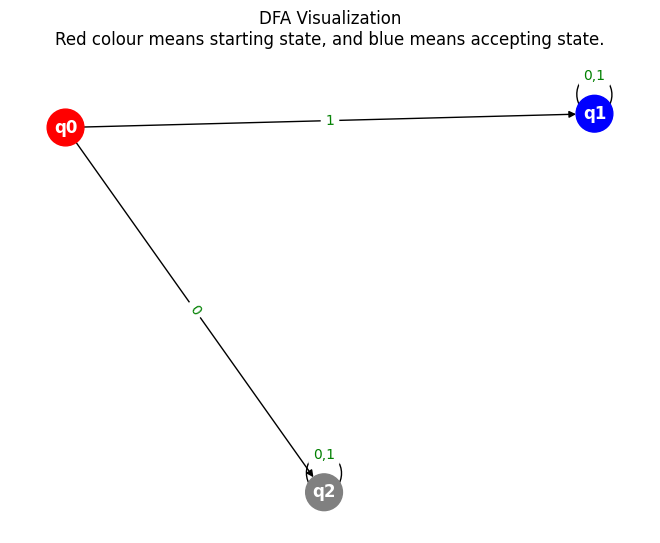


Do you satisfy with this DFA? (Y or N): Y

****** Now your DFA is ready for testing.


In [84]:
#You have to run this cell.
user = input("Do you want to start the process? (Y or N): ")

if user == "Y":
  #inputs
  all_states = input("Enter all DFA states separated by space (e.g., A B C): ").split(" ")
  srt_state = input("Enter the start state of the DFA: ")
  accept_state = input("Enter all accepting states separated by space (e.g., B, C): ").split(" ")
  alphabets = input("Enter all alphabets separated by space (e.g., 0 1): ").split(" ")

  #function for creating DFA
  dfa_dict = {}
  dfa = {} #create this only for testing different cases
  result = createDFA(dfa,dfa_dict,all_states,srt_state,accept_state,alphabets)
  dfa_dict = result[0]
  dfa = result[1]


  print()
  visualize(dfa_dict)
  print()
  satisfy = input("Do you satisfy with this DFA? (Y or N): ")
  if satisfy == "Y":
    print()
    print("****** Now your DFA is ready for testing.")
  else:
    print()
    print("****** Again, run this cell.")

else:
  print("OK")

In [85]:
def check_test_case(srt_state,accept_state,dfa,test_case):

  info = dfa[srt_state]
  current_state = srt_state

  for i in test_case:
    for j in info:
      if j[1] == i:
        info = dfa[j[0]]
        current_state = j[0]

  if current_state in accept_state:
    return "Accepted"
  else:
    return "Not Accepted"

In [89]:
test_case = input("Enter your test case value: ")
result = check_test_case(srt_state,accept_state,dfa,test_case)

print(result)

Enter your test case value: 101
Accepted
